In [1]:
from util import load_eidc_data

texts = load_eidc_data.load_title_description_lineage('util/catalogue_metadata.json')

In [2]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [3]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedding_model.encode(texts)

In [4]:
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, PartOfSpeech, MaximalMarginalRelevance

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
keybert_model = KeyBERTInspired()
pos_model = PartOfSpeech('en_core_web_sm')
mmr_model = MaximalMarginalRelevance(diversity=0.3)
representation_model={
    'POS': pos_model,
    'MMR': mmr_model,
    'KeyBERT': keybert_model
}
vectorizer_model = CountVectorizer(stop_words='english', min_df=2, ngram_range=(1,2))
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    top_n_words=10,
    verbose=True
    )
topics, probs = topic_model.fit_transform(texts, embeddings)
topic_model.get_topic_info()

2024-05-30 14:39:01,936 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-30 14:39:32,589 - BERTopic - Dimensionality - Completed ✓
2024-05-30 14:39:32,592 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-30 14:39:32,766 - BERTopic - Cluster - Completed ✓
2024-05-30 14:39:32,788 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-30 14:40:23,058 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,POS,MMR,KeyBERT,Representative_Docs
0,-1,360,-1_data_uk_species_used,"[data, uk, species, used, dataset, monitoring,...","[data, species, dataset, monitoring, site, tim...","[data, uk, species, used, dataset, monitoring,...","[butterfly monitoring, butterfly, ecology, ind...",[United Kingdom Butterfly Monitoring Scheme: c...
1,0,192,0_countryside_survey_countryside survey_data,"[countryside, survey, countryside survey, data...","[countryside, survey, data, squares, habitat, ...","[countryside, survey, countryside survey, data...","[countryside survey, uk countryside, habitat d...",[Countryside Survey 1984 estimates of Broad Ha...
2,1,178,1_water_samples_data_river,"[water, samples, data, river, collected, sedim...","[water, samples, data, river, sediment, carbon...","[water, samples, data, river, collected, sedim...","[water samples, catchment, water quality, wate...",[Carbon and nutrient data for rainfall fractio...
3,2,147,2_soil_carbon_experiment_data,"[soil, carbon, experiment, data, biomass, samp...","[soil, carbon, experiment, data, biomass, samp...","[soil, carbon, experiment, data, biomass, samp...","[soil samples, soils, soil, grassland, soil co...",[Microbial biomass measurements from an upland...
4,3,125,3_forest_plots_leaf_trees,"[forest, plots, leaf, trees, data, tree, fores...","[forest, plots, leaf, trees, data, tree, fores...","[forest, plots, leaf, trees, data, tree, fores...","[tropical forest, rainforest, forests, vegetat...",[Herbivory occurrence and intensity of Clidemi...
5,4,119,4_river_flow_model_data,"[river, flow, model, data, hydrological, grid,...","[river, flow, model, data, hydrological, grid,...","[river, flow, model, data, hydrological, grid,...","[river flow, hydrological, catchments, catchme...",[ Grid-to-Grid model estimates of river flow f...
6,5,85,5_deposition_nitrogen_critical_ozone,"[deposition, nitrogen, critical, ozone, uk, am...","[deposition, nitrogen, critical, ozone, ammoni...","[deposition, nitrogen, critical, ozone, uk, am...","[nitrogen deposition, deposition values, ammon...",[Deposition and concentration values for prote...
7,6,75,6_land_land cover_cover_product,"[land, land cover, cover, product, land parcel...","[land, cover, product, parcels, band, classes,...","[land, land cover, cover, product, land parcel...","[classification land, classified land, land co...","[Land Cover Map 2022 (10m classified pixels, G..."
8,7,56,7_samples_stream_river_data,"[samples, stream, river, data, sample, country...","[samples, stream, river, data, sample, country...","[samples, stream, river, data, sample, country...","[ecology hydrology, freshwater, catchment, upl...",[Macroinvertebrate composition of Welsh upland...
9,8,55,8_pollen_pollinator_plants_species,"[pollen, pollinator, plants, species, flower, ...","[pollen, pollinator, plants, species, flower, ...","[pollen, pollinator, plants, species, flower, ...","[pollination, bees, pollinators, flowering, pl...",[The seed set of supplemented and pollinator e...


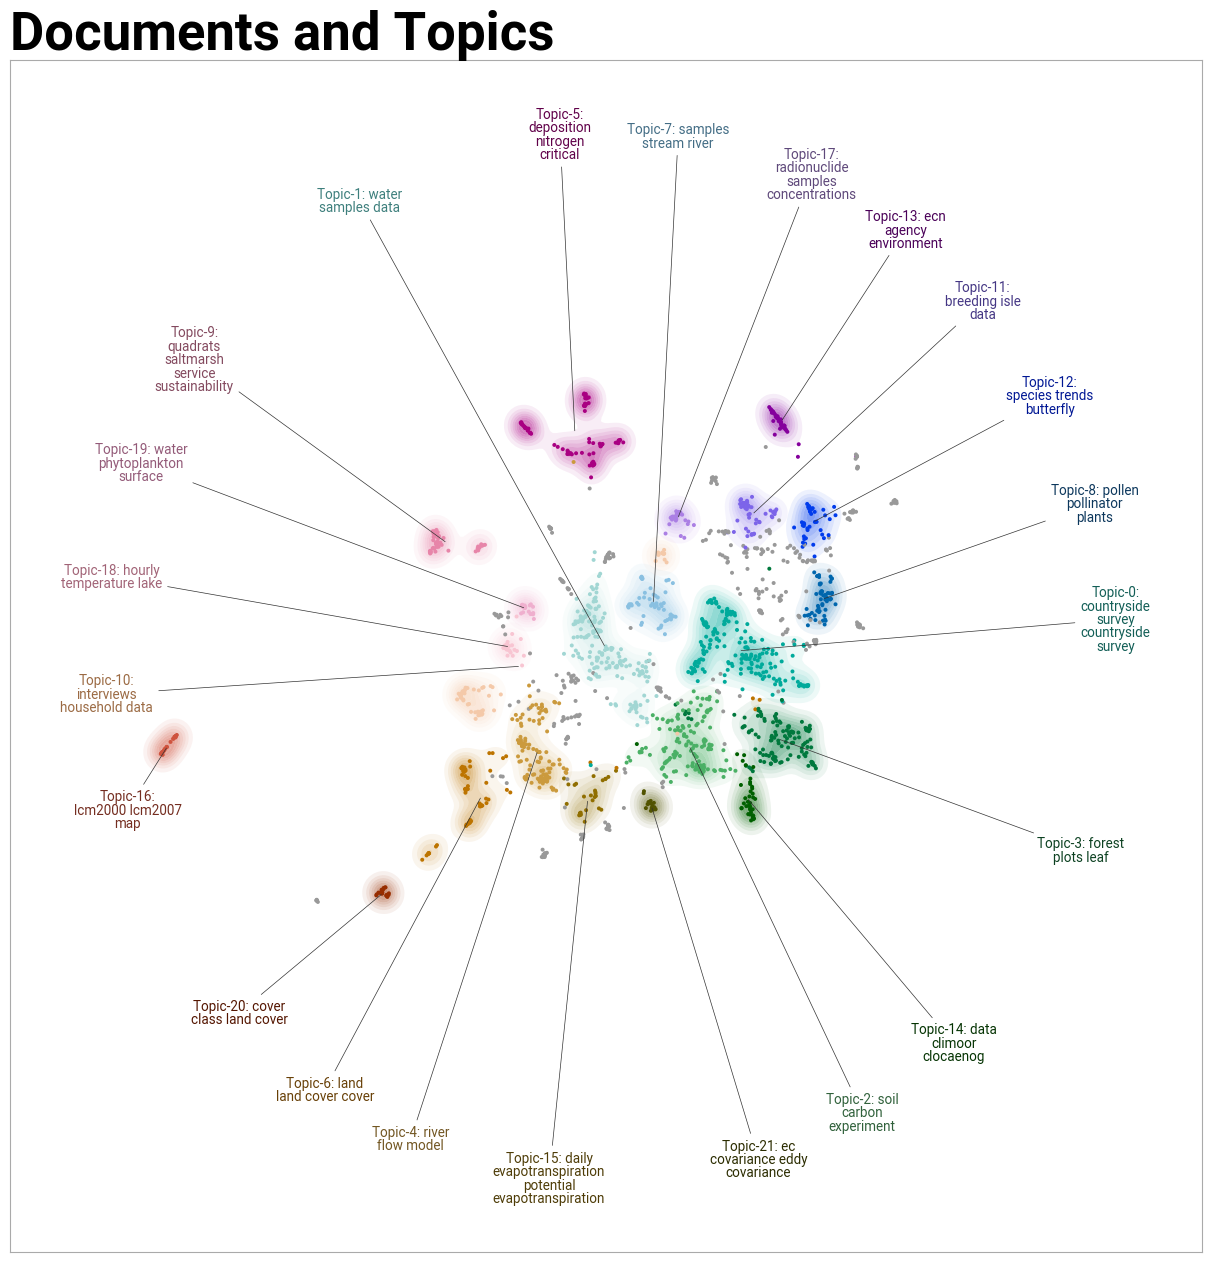

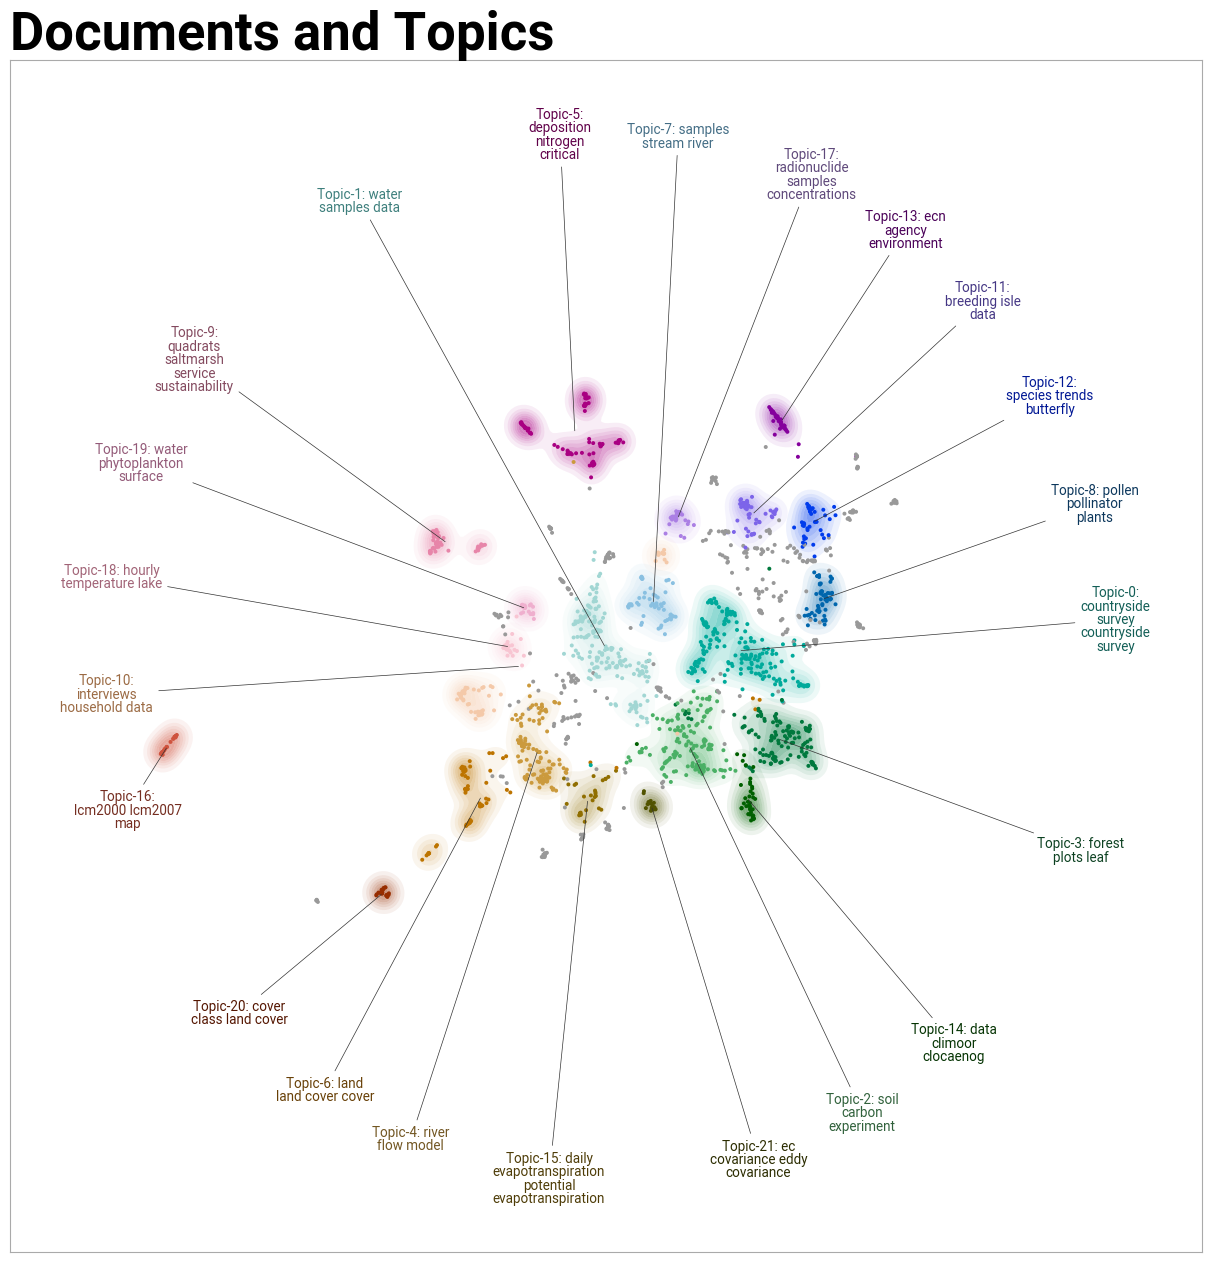

In [5]:
topic_model.visualize_document_datamap(texts, embeddings=embeddings)